### Import the relevant libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

### Loading the dataset from the parent directory

In [2]:
current_directory = os.getcwd()

# Specify the path to the CSV file in the parent directory
csv_file_path = os.path.join(current_directory, 'Reddit_Title.csv')

In [3]:
df = pd.read_csv(csv_file_path, sep=';')
df

,title,label,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,My aunt and uncle scoring their first gig as p...,0,NaN,NaN,NaN
1,How do I stop stressing about work when I'm at...,1,NaN,NaN,NaN
2,Meeting a fellow suicidal student in middle sc...,1,NaN,NaN,NaN
3,My brain feels literally numb. Is this depress...,1,NaN,NaN,NaN
4,A mother's reaction after seeing her son has p...,0,NaN,NaN,NaN
...,...,...,...,...,...
5551,So burnt out and mentally gone,1,NaN,NaN,NaN
5552,My husband and I got some chicks together toda...,0,NaN,NaN,NaN
5553,I woke up and just started crying,1,NaN,NaN,NaN
5554,"I wanted the world to increase in happiness, a...",0,NaN,NaN,NaN


### Summary table

In [4]:
df.describe(include='all')

,title,label,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5556,5556.00000,0.0,0.0,0.0
unique,5522,NaN,NaN,NaN,NaN
top,School stress,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,NaN,NaN
mean,NaN,0.49406,NaN,NaN,NaN
std,NaN,0.50001,NaN,NaN,NaN
min,NaN,0.00000,NaN,NaN,NaN
25%,NaN,0.00000,NaN,NaN,NaN
50%,NaN,0.00000,NaN,NaN,NaN
75%,NaN,1.00000,NaN,NaN,NaN


### Dropping irrelevant columns

In [5]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

df.describe(include='all')

,title,label
count,5556,5556.00000
unique,5522,NaN
top,School stress,NaN
freq,3,NaN
mean,NaN,0.49406
std,NaN,0.50001
min,NaN,0.00000
25%,NaN,0.00000
50%,NaN,0.00000
75%,NaN,1.00000


### Looking for null values

In [6]:
df.isnull().sum()

title    0
label    0
dtype: int64

### Creating a visual graph to see the proportion of stressed and unstressed people in the dataset

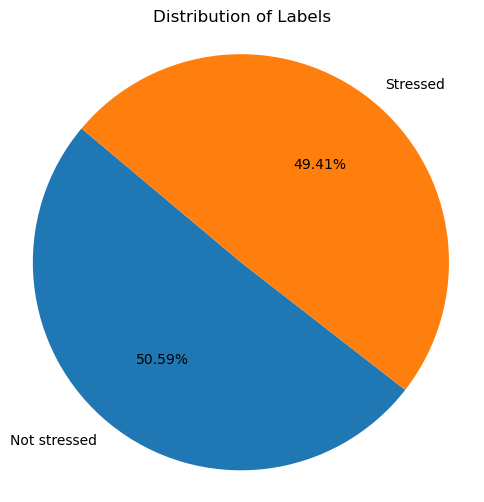

In [7]:
label_counts = df['label'].value_counts()

label_counts.index = ['Not stressed' if i == 0 else 'Stressed' for i in label_counts.index]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.2f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Labels')
plt.show()

In [8]:
print(f'The number of stressed people in the dataset is {label_counts[1]}')
print(f'The number of people who are not stressed in the dataset is {label_counts[0]}')

The number of stressed people in the dataset is 2745
The number of people who are not stressed in the dataset is 2811


## Defining a function to create word cloud graph to see which word is repeated the most in the article of stressed and unstressed people

In [9]:
def wordCloud(col, label_value):
    # Filter the DataFrame based on the label value
    filtered_df = df[df['label'] == label_value]
    
    # Combine all the strings in the column into a single string
    text = ' '.join(filtered_df[col])
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    
    plt.title(f'Word Cloud for label {"Stress Negative" if label_value == 0 else "Stress Positive"} of column {col}')
    plt.show()

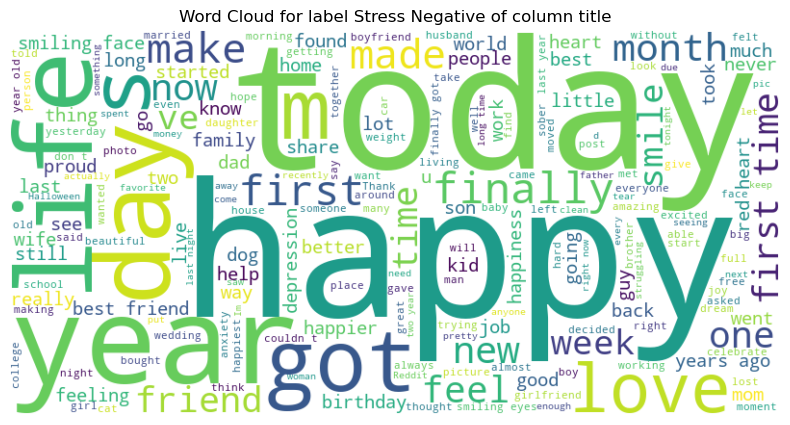

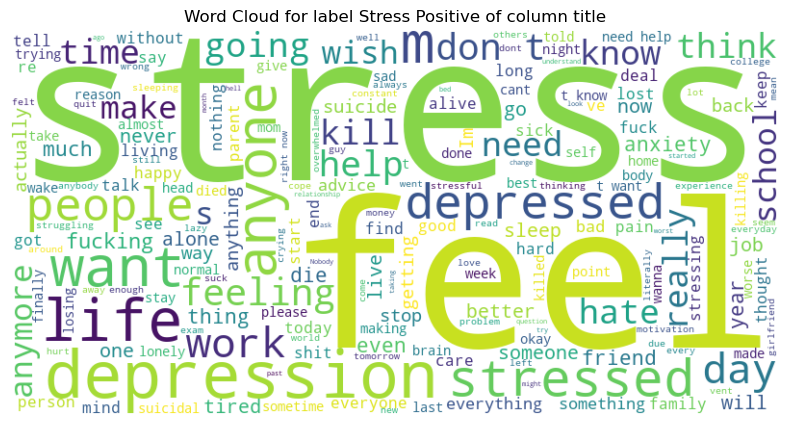

In [10]:
wordCloud('title', 0)
wordCloud('title', 1)

### Transforming the textual data into numerical matrix using count vectorizer class

In [11]:
count=CountVectorizer()
title = count.fit_transform(df['title'])

### Separating the targets

In [12]:
targets = df['label']

### Creating a Multilayer Perceptron model to predict whether the person is stressed or not from the article

In [13]:
def MLP(col):
    inputs =col
    
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.2, random_state=1)

    # Implementing model with better parameter
    params = {
        'hidden_layer_sizes': [(10,10,10), (50,50,50)],
        'max_iter': [300, 400, 500]
    }
    
    mlp_clf = MLPClassifier(
        activation= 'relu',
        solver= 'adam',
        learning_rate= 'adaptive',
        early_stopping= True)
    
    mlp_clf_gsv = GridSearchCV(estimator=mlp_clf, param_grid=params)
    mlp_clf_gsv.fit(inputs_train, targets_train)
    
    mlp_clf_model = mlp_clf_gsv.best_estimator_
    mlp_clf_model.fit(inputs_train, targets_train)
    
    mlp_clf_train_score = (accuracy_score(targets_train, mlp_clf_model.predict(inputs_train)) * 100).round(2)
    mlp_clf_test_score = (accuracy_score(targets_test, mlp_clf_model.predict(inputs_test)) * 100).round(2)
    print("Train Accuracy score of the MLP Classifier model is:\t", (mlp_clf_train_score))
    print("Test Accuracy score of the MLP Classifier model is:\t", (mlp_clf_test_score))

In [14]:
print(f"\n\nAccuracy of the Multilayer Perceptron model build training in the column: title")
MLP(title)



Accuracy of the Multilayer Perceptron model build training in the column: title
Train Accuracy score of the MLP Classifier model is:	 99.32
Test Accuracy score of the MLP Classifier model is:	 93.71


### Creating a Multinomial Naive Bayes model to predict whether the person is stressed or not from the article

In [15]:
def MNB(col):
    inputs = col
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.2, random_state=1)
    
    multinomial_clf = MultinomialNB()
    multinomial_clf.fit(inputs_train, targets_train)
    
    multinomial_clf_train_score = (accuracy_score(targets_train, multinomial_clf.predict(inputs_train)) * 100).round(2)
    multinomial_clf_test_score = (accuracy_score(targets_test, multinomial_clf.predict(inputs_test)) * 100).round(2)

    print("Train Accuracy score of the MNB Classifier model is:\t", (multinomial_clf_train_score))
    print("Test Accuracy score of the MNB Classifier model is:\t", (multinomial_clf_test_score))

In [16]:
print(f"\n\nAccuracy of the Multinomial NB Model build training in the column: title")
MNB(title)



Accuracy of the Multinomial NB Model build training in the column: title
Train Accuracy score of the MNB Classifier model is:	 94.01
Test Accuracy score of the MNB Classifier model is:	 91.28


### Creating a Bernoulli Naive Bayes model to predict whether the person is stressed or not from the article

In [17]:
def BNB(col):
    inputs = col
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.2, random_state=1)
    
    bernoulli_clf = BernoulliNB()
    bernoulli_clf.fit(inputs_train, targets_train)
    
    bernoulli_clf_train_score = (accuracy_score(targets_train, bernoulli_clf.predict(inputs_train)) * 100).round(2)
    bernoulli_clf_test_score = (accuracy_score(targets_test, bernoulli_clf.predict(inputs_test)) * 100).round(2)
    
    # print(f"Accuracy of the Bernoulli NB Model build training in the column: {col}")
    print("Train Accuracy score of the Bernoulli Naive Bayes model is:\t", (bernoulli_clf_train_score))
    print("Test Accuracy score of the Bernoulli Naive Bayes model is:\t", (bernoulli_clf_test_score))

In [18]:
print(f"\n\nAccuracy of the Bernoulli Naive Bayes Model build training in the column: title")
BNB(title)



Accuracy of the Bernoulli Naive Bayes Model build training in the column: title
Train Accuracy score of the Bernoulli Naive Bayes model is:	 92.75
Test Accuracy score of the Bernoulli Naive Bayes model is:	 89.93


### From the above results, it is clear that predicting whether the person is stressed or not based on the article with the input "title", the model build with Multilayer Perceptron algorithm outperforms other

It is obvious as it is neural network whereas other model are linear